In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
from matplotlib.legend_handler import HandlerTuple
import seaborn as sns
import math
import os

In [2]:
COLOR_HEIDENELKE = '#9C004B'
COLOR_GLUTROT = '#DA3C43'
COLOR_BLUE= '#5CABFF'
COLOR_DARKBLUE = '#18206F'

COLOR_NONE = '#8E8E8D'

FRAMEWORK_ORDER = ['WinUI', 'WinAPI', 'GDIplus', 'Direct3D', 'Direct2D', 'Blend2D', 'Cairo', 'FLTK', 'Java2D', 'JavaSwing','Qt5', 'Qt6', 'pyqt5', 'pyqt6', 'pyqt6_quick', 'tkinter', 'wxpython', 'wxpython_d2d', 'SDL2_Direct3D', 'SDL2_OpenGLES', 'SDL2_OpenGL', 'SDL2_Software', 'pygame', 'pyglet', 'GTK', 'GLUT', 'GLEW', 'SFML', 'Skia']

In [3]:
PATH_NO_VSYNC_60 = "../data/vsync_off_60hz"
PATH_NO_VSYNC_500 = "../data/finals_frameworks"

In [4]:
files_no_vsync_60 = os.listdir(PATH_NO_VSYNC_60)
files_no_vsync_60 = [x for x in files_no_vsync_60 if 'csv' in x]

files_no_vsync_500 = os.listdir(PATH_NO_VSYNC_500)
files_no_vsync_500 = [x for x in files_no_vsync_500 if 'csv' in x]

In [5]:
file_data = []
for file in files_no_vsync_60:
    data_in = pd.read_csv(f"{PATH_NO_VSYNC_60}/{file}", index_col=False)
    file_data.append(data_in)
    
data_60hz = pd.concat(file_data)

In [6]:
file_data = []
for file in files_no_vsync_500:
    data_in = pd.read_csv(f"{PATH_NO_VSYNC_500}/{file}", index_col=False)
    file_data.append(data_in)
    
data_500hz = pd.concat(file_data)

In [7]:
data_60hz['refresh_rate'] = 60
data_60hz

,Unnamed: 0,id,threshold,framework,complexity,framework_complexity,fullscreen,fullscreen_mode,program,ete_upper,ete_lower,fw,diff,refresh_rate
0,0,0,2351,Blend2D,default,Blend2D_default,fullscreen,2.0,getpixel,60881,64234,12680,48201,60
1,1,1,2351,Blend2D,default,Blend2D_default,fullscreen,2.0,getpixel,67081,70260,16949,50132,60
2,2,2,2351,Blend2D,default,Blend2D_default,fullscreen,2.0,getpixel,64345,67699,14284,50061,60
3,3,3,2351,Blend2D,default,Blend2D_default,fullscreen,2.0,getpixel,63791,67134,13820,49971,60
4,4,4,2351,Blend2D,default,Blend2D_default,fullscreen,2.0,getpixel,63467,66829,13552,49915,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,195,2528,wxpython,default,wxpython_default,fullscreen,2.0,windup,53697,57314,21255,32442,60
196,196,196,2528,wxpython,default,wxpython_default,fullscreen,2.0,windup,62728,66077,29786,32942,60
197,197,197,2528,wxpython,default,wxpython_default,fullscreen,2.0,windup,54770,58121,22128,32642,60
198,198,198,2528,wxpython,default,wxpython_default,fullscreen,2.0,windup,56095,59718,23580,32515,60


In [8]:
data_500hz = data_500hz[data_500hz['program'] != 'bitblt']
data_500hz = data_500hz[data_500hz['program'] != 'getdbits']
data_500hz = data_500hz[data_500hz['complexity'] == 'default']
data_500hz = data_500hz[data_500hz['fullscreen'] == 'fullscreen']
data_500hz['refresh_rate'] = 500
data_500hz

,Unnamed: 0,id,threshold,framework,complexity,framework_complexity,fullscreen,fullscreen_mode,program,ete_upper,ete_lower,fw,diff,refresh_rate
0,0,0,2310,Blend2D,default,Blend2D_default,fullscreen,2.0,getpixel,11810,14128,5701,6109,500
1,1,1,2310,Blend2D,default,Blend2D_default,fullscreen,2.0,getpixel,12160,14305,6129,6031,500
2,2,2,2310,Blend2D,default,Blend2D_default,fullscreen,2.0,getpixel,10772,13260,4799,5973,500
3,3,3,2310,Blend2D,default,Blend2D_default,fullscreen,2.0,getpixel,11461,13775,5455,6006,500
4,4,4,2310,Blend2D,default,Blend2D_default,fullscreen,2.0,getpixel,10772,12916,7094,3678,500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,195,2299,wxpython,default,wxpython_default,fullscreen,2.0,windup,8009,10332,4494,3515,500
196,196,196,2299,wxpython,default,wxpython_default,fullscreen,2.0,windup,8011,10335,4916,3095,500
197,197,197,2299,wxpython,default,wxpython_default,fullscreen,2.0,windup,7496,9646,4322,3174,500
198,198,198,2299,wxpython,default,wxpython_default,fullscreen,2.0,windup,7330,9647,4029,3301,500


In [9]:
data = pd.concat([data_60hz, data_500hz])
data['ete_upper'] = data['ete_upper'] / 1000
data['ete_lower'] = data['ete_lower'] / 1000
data['fw'] = data['fw'] / 1000
data['diff'] = data['diff'] / 1000
data

,Unnamed: 0,id,threshold,framework,complexity,framework_complexity,fullscreen,fullscreen_mode,program,ete_upper,ete_lower,fw,diff,refresh_rate
0,0,0,2351,Blend2D,default,Blend2D_default,fullscreen,2.0,getpixel,60.881,64.234,12.680,48.201,60
1,1,1,2351,Blend2D,default,Blend2D_default,fullscreen,2.0,getpixel,67.081,70.260,16.949,50.132,60
2,2,2,2351,Blend2D,default,Blend2D_default,fullscreen,2.0,getpixel,64.345,67.699,14.284,50.061,60
3,3,3,2351,Blend2D,default,Blend2D_default,fullscreen,2.0,getpixel,63.791,67.134,13.820,49.971,60
4,4,4,2351,Blend2D,default,Blend2D_default,fullscreen,2.0,getpixel,63.467,66.829,13.552,49.915,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,195,2299,wxpython,default,wxpython_default,fullscreen,2.0,windup,8.009,10.332,4.494,3.515,500
196,196,196,2299,wxpython,default,wxpython_default,fullscreen,2.0,windup,8.011,10.335,4.916,3.095,500
197,197,197,2299,wxpython,default,wxpython_default,fullscreen,2.0,windup,7.496,9.646,4.322,3.174,500
198,198,198,2299,wxpython,default,wxpython_default,fullscreen,2.0,windup,7.330,9.647,4.029,3.301,500


In [10]:
# remove negative diff, failed validation
data = data[data['diff'] > 0]  

# remove absolute outliers
data = data.loc[~((data['framework'] == 'GDIplus') & (data['program'] == 'getpixel') & (data['diff'] > 7))] 
data = data.loc[~((data['framework'] == 'Skia') & (data['program'] == 'windup') & (data['diff'] < 0))] 

# remove based on program validation (z-value removal)
#  {'program': 'getpixel', 'framework': 'GTK'},
#  {'program': 'getpixel', 'framework': 'pyglet'},
#  {'program': 'windup', 'framework': 'Java2D'},
#  {'program': 'windup', 'framework': 'JavaSwing'},
#  {'program': 'windup', 'framework': 'pygame'},
#  {'program': 'windup', 'framework': 'pyqt6_quick'},
#  {'program': 'windup', 'framework': 'SDL2_Direct3D'}
data = data.loc[~((data['framework'] == 'GTK') & (data['program'] == 'getpixel'))]
data = data.loc[~((data['framework'] == 'pyglet') & (data['program'] == 'getpixel'))]
data = data.loc[~((data['framework'] == 'Java2D') & (data['program'] == 'windup'))]
data = data.loc[~((data['framework'] == 'JavaSwing') & (data['program'] == 'windup'))]
data = data.loc[~((data['framework'] == 'pygame') & (data['program'] == 'windup'))]
data = data.loc[~((data['framework'] == 'pyqt6_quick') & (data['program'] == 'windup'))]
data = data.loc[~((data['framework'] == 'SDL2_Direct3D') & (data['program'] == 'windup'))]

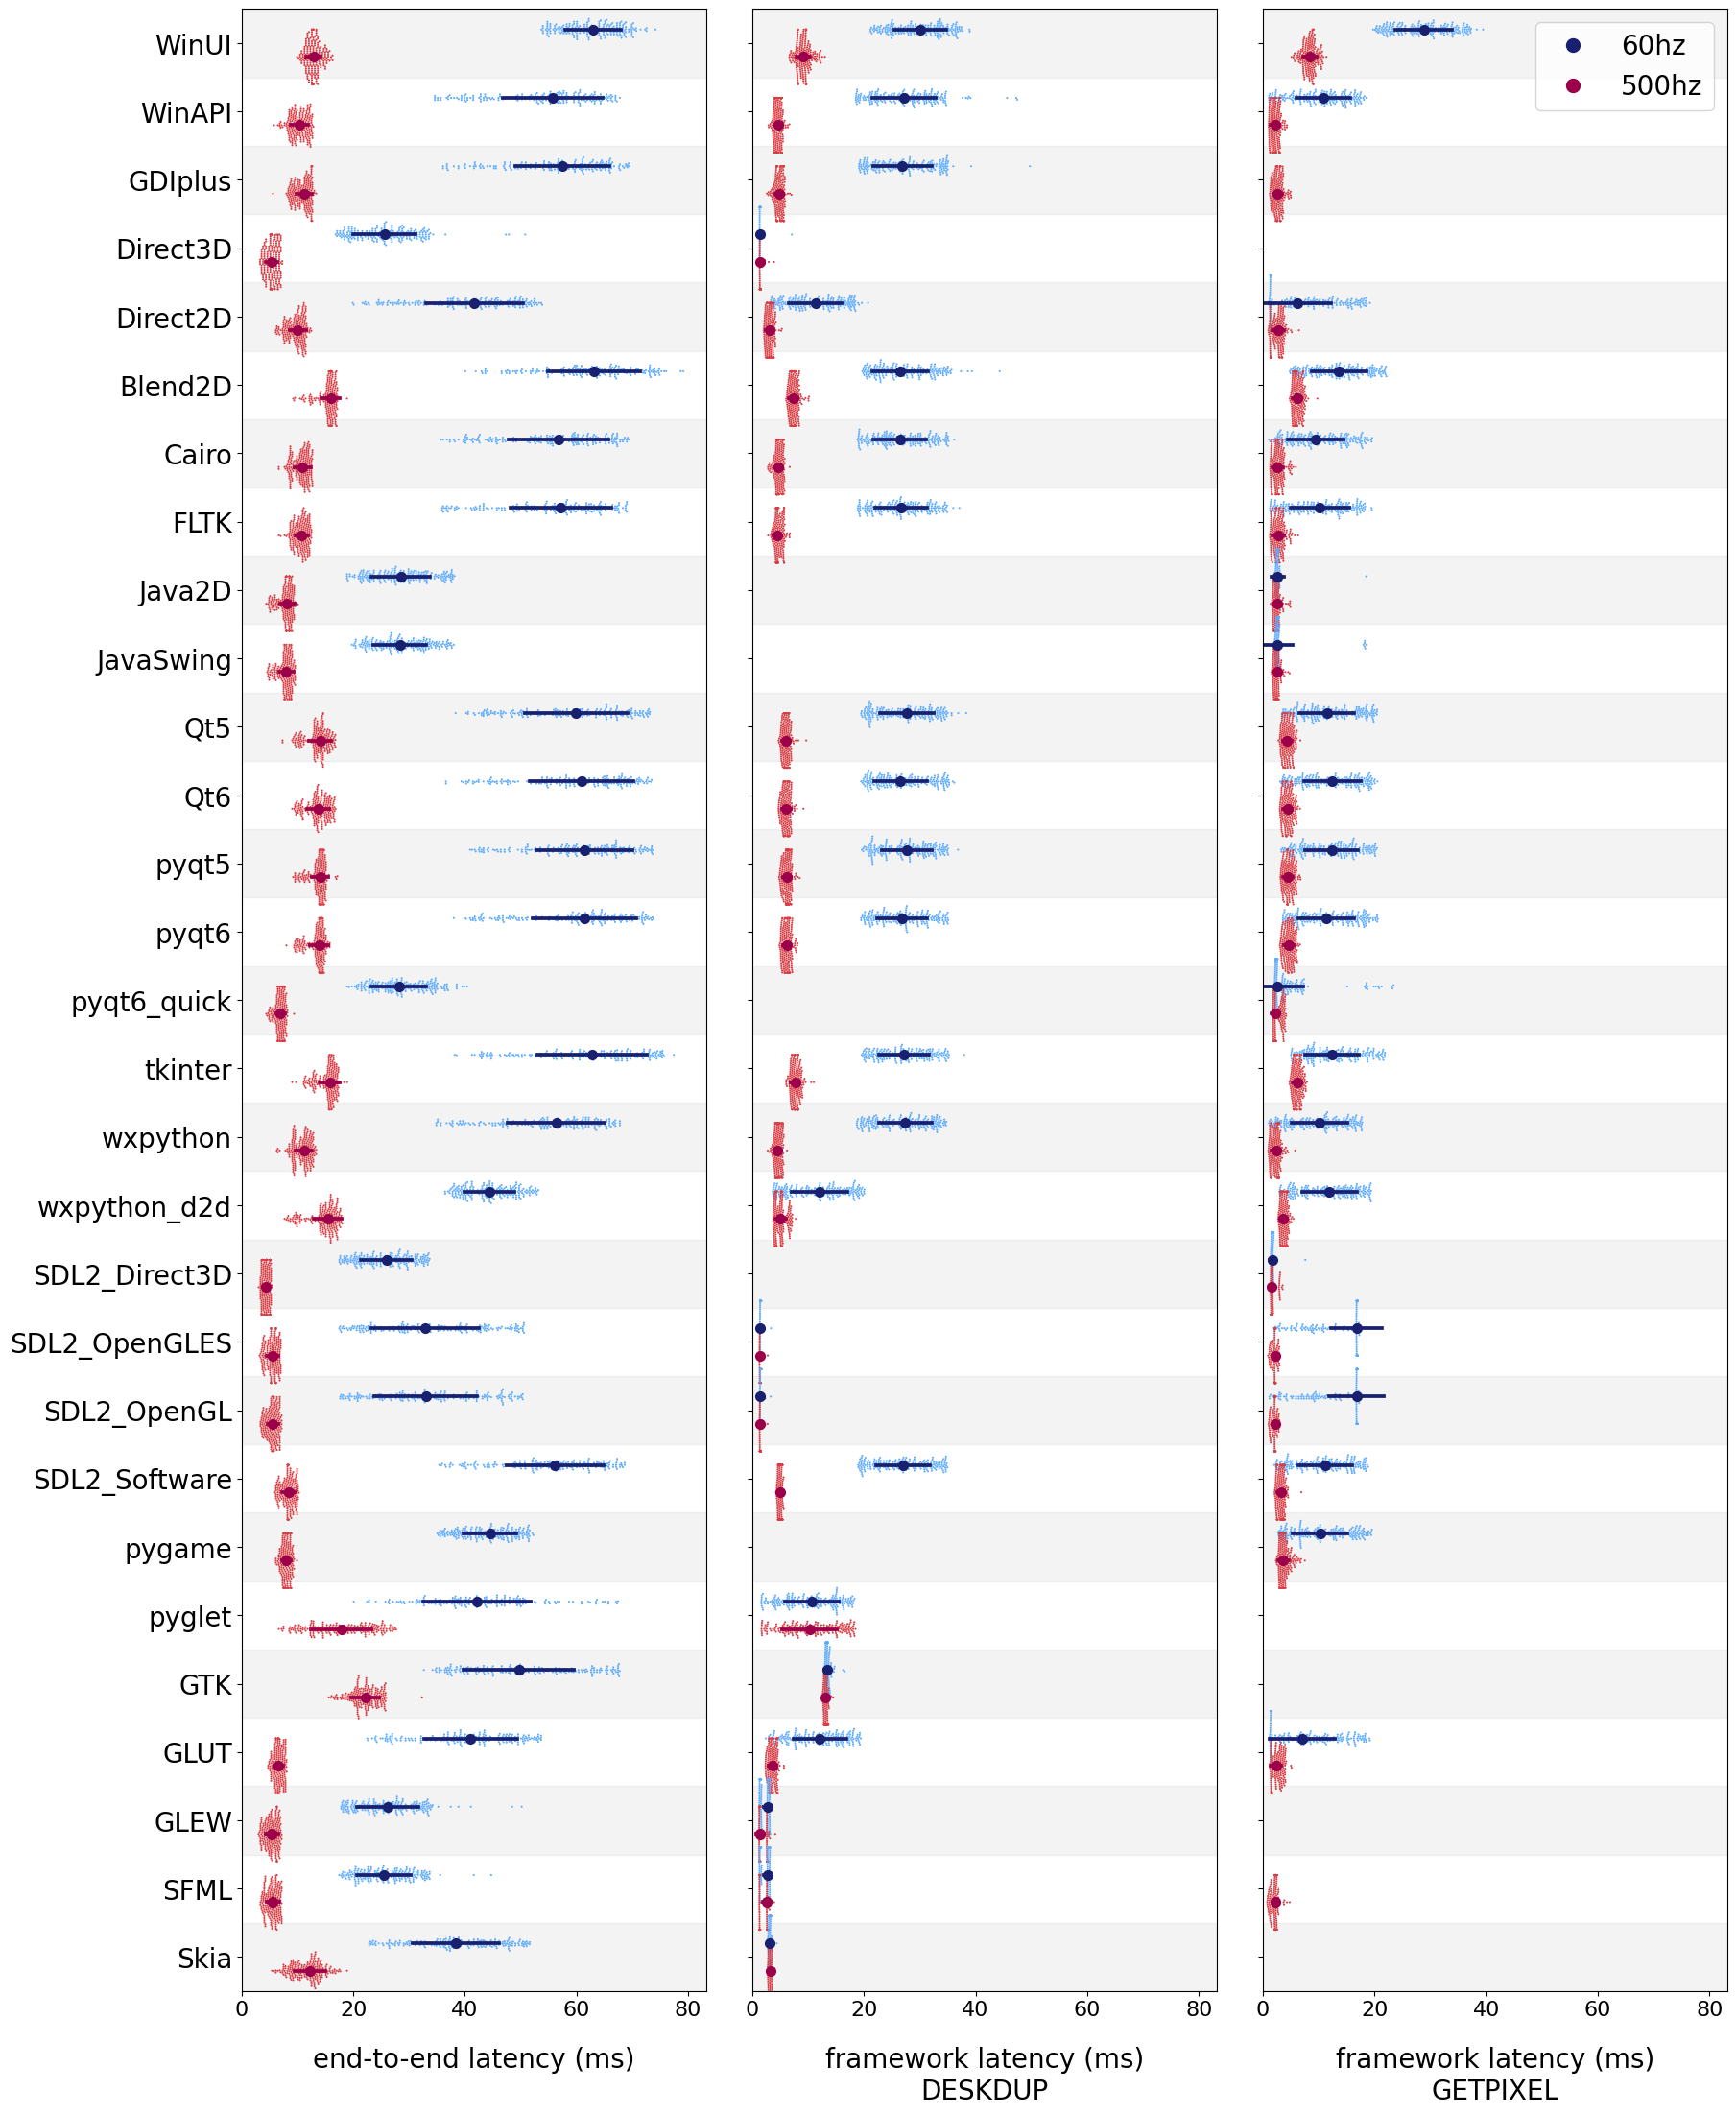

In [11]:
fig, axs = plt.subplots(1, 3, layout='constrained', sharex=True, sharey=True, figsize=(20, 28))

# fig.suptitle('Latency Measurements for Different Refresh Rates', y=1.001, fontsize=26)

axs[0].tick_params(axis='y', labelsize=20)
axs[1].tick_params(axis='y', labelsize=20)
axs[2].tick_params(axis='y', labelsize=20)
axs[0].tick_params(axis='x', labelsize=16)
axs[1].tick_params(axis='x', labelsize=16)
axs[2].tick_params(axis='x', labelsize=16)

# stripped background
for i in range(len(data['framework'].unique())):
    if i % 2 == 0:
        axs[0].axhspan(i - 0.5, i + 0.5, color=COLOR_NONE, alpha=0.1)
        axs[1].axhspan(i - 0.5, i + 0.5, color=COLOR_NONE, alpha=0.1)
        axs[2].axhspan(i - 0.5, i + 0.5, color=COLOR_NONE, alpha=0.1)
axs[0].set_ylim(-0.5, len(data['framework'].unique()) - 0.5)
axs[1].set_ylim(-0.5, len(data['framework'].unique()) - 0.5)
axs[2].set_ylim(-0.5, len(data['framework'].unique()) - 0.5)

plot = sns.swarmplot(ax=axs[0], data=data[data['program'] == 'none'], x='ete_upper', y='framework', order=FRAMEWORK_ORDER, hue='refresh_rate', size=1.5, dodge=True, hue_order=[60, 500], palette=[COLOR_BLUE, COLOR_GLUTROT], legend=False, zorder=1)
plot = sns.swarmplot(ax=axs[1], data=data[(data['program'] == 'windup') & (data['fw'] != -0.001)], x='fw', y='framework', order=FRAMEWORK_ORDER, hue='refresh_rate', size=1.5, dodge=True, hue_order=[60, 500], palette=[COLOR_BLUE, COLOR_GLUTROT], legend=False, zorder=1)
plot = sns.swarmplot(ax=axs[2], data=data[(data['program'] == 'getpixel') & (data['fw'] != -0.001)], x='fw', y='framework', order=FRAMEWORK_ORDER, hue='refresh_rate', size=1.5, dodge=True, hue_order=[60, 500], palette=[COLOR_BLUE, COLOR_GLUTROT], legend=False, zorder=1)
plot = sns.pointplot(ax=axs[0], data=data[data['program'] == 'none'], x='ete_upper', y='framework', order=FRAMEWORK_ORDER, hue='refresh_rate', hue_order=[60, 500], palette=[COLOR_DARKBLUE, COLOR_HEIDENELKE], legend=False, dodge=0.4, join=False, estimator=np.median, errorbar='sd', markersize=6, zorder=2)
plot = sns.pointplot(ax=axs[1], data=data[(data['program'] == 'windup') & (data['fw'] != -0.001)], x='fw', y='framework', order=FRAMEWORK_ORDER, hue='refresh_rate', hue_order=[60, 500], palette=[COLOR_DARKBLUE, COLOR_HEIDENELKE], legend=False, dodge=0.4, join=False, estimator=np.median, errorbar='sd', markersize=6, zorder=2)
plot = sns.pointplot(ax=axs[2], data=data[(data['program'] == 'getpixel') & (data['fw'] != -0.001)], x='fw', y='framework', order=FRAMEWORK_ORDER, hue='refresh_rate', hue_order=[60, 500], palette=[COLOR_DARKBLUE, COLOR_HEIDENELKE], dodge=0.4, join=False, estimator=np.median, errorbar='sd', markersize=6, zorder=2)

# increase label size
axs[0].set_xlabel('end-to-end latency (ms)', fontsize=20)
axs[1].set_xlabel('framework latency (ms)\nDESKDUP', fontsize=20)
axs[2].set_xlabel('framework latency (ms)\nGETPIXEL', fontsize=20)
axs[0].xaxis.labelpad = 20
axs[1].xaxis.labelpad = 20
axs[2].xaxis.labelpad = 20
axs[0].set_ylabel('')

plot.set_xlim(left=0)

legend = plt.legend(title='', fontsize=20, loc='upper right', markerscale=1.5)
legend.get_texts()[0].set_text('60hz')
legend.get_texts()[1].set_text('500hz')

plt.tight_layout()
plt.subplots_adjust(wspace=0.1)
plt.savefig("./figures/refresh_rate.pdf", format='pdf', bbox_inches='tight')

In [12]:
data_temp = data[data['program'] == 'none']
median_60 = data_temp[data_temp['refresh_rate'] == 60]['ete_upper'].median()
median_500 = data_temp[data_temp['refresh_rate'] == 500]['ete_upper'].median()
print(median_60 - median_500)

std_60 = data_temp[data_temp['refresh_rate'] == 60]['ete_upper'].std()
std_500 = data_temp[data_temp['refresh_rate'] == 500]['ete_upper'].std()
print(std_60, std_500)

35.4965
15.254370329665706 4.599961053043229


In [13]:
data_temp = data[data['program'] == 'windup']
data_windup_table = pd.DataFrame(columns=['framework', '60hz_median', '60hz_std', '500hz_median' ,'500hz_std', 'diff'])

for i, framework in enumerate(data['framework'].unique()):
    fw_data = data_temp[data_temp['framework'] == framework]
    data_windup_table.at[i, 'framework'] = framework
    data_windup_table.at[i, '60hz_median'] = fw_data[fw_data['refresh_rate'] == 60]['fw'].median()
    data_windup_table.at[i, '60hz_std'] = fw_data[fw_data['refresh_rate'] == 60]['fw'].std()
    data_windup_table.at[i, '500hz_median'] = fw_data[fw_data['refresh_rate'] == 500]['fw'].median()
    data_windup_table.at[i, '500hz_std'] = fw_data[fw_data['refresh_rate'] == 500]['fw'].std()

data_windup_table['diff'] = data_windup_table['60hz_median'] - data_windup_table['500hz_median']

data_windup_table['framework'] = pd.Categorical(data_windup_table['framework'], categories=FRAMEWORK_ORDER, ordered=True)
data_windup_table = data_windup_table.sort_values(by='framework')

# df_sorted.round({'none':2, 'getpixel':2, 'diff getpixel':2, 'bitblt':2, 'diff bitblt':2, 'getdbits':2, 'diff getdbits':2, 'windup':2, 'diff windup':2})
df_rounded = data_windup_table.copy()
df_rounded['60hz_median'] = df_rounded['60hz_median'].astype(float).round(2)
df_rounded['60hz_std'] = df_rounded['60hz_std'].astype(float).round(2)
df_rounded['500hz_median'] = df_rounded['500hz_median'].astype(float).round(2)
df_rounded['500hz_std'] = df_rounded['500hz_std'].astype(float).round(2)
df_rounded['diff'] = df_rounded['diff'] .astype(float).round(2)

print(df_rounded.to_latex(index=False,
                  formatters={"name": str.upper},
                  float_format="{:.2f}".format,
))

df_rounded

\begin{tabular}{lrrrrr}
\toprule
framework & 60hz_median & 60hz_std & 500hz_median & 500hz_std & diff \\
\midrule
WinUI & 30.05 & 4.66 & 9.15 & 1.25 & 20.90 \\
WinAPI & 27.17 & 5.60 & 4.59 & 0.64 & 22.58 \\
GDIplus & 26.91 & 5.32 & 4.86 & 0.71 & 22.05 \\
Direct3D & 1.38 & 0.41 & 1.40 & 0.23 & -0.02 \\
Direct2D & 11.29 & 4.78 & 3.11 & 0.61 & 8.18 \\
Blend2D & 26.50 & 4.95 & 7.35 & 0.76 & 19.15 \\
Cairo & 26.47 & 4.71 & 4.67 & 0.65 & 21.80 \\
FLTK & 26.65 & 4.58 & 4.55 & 0.68 & 22.10 \\
Java2D & NaN & NaN & NaN & NaN & NaN \\
JavaSwing & NaN & NaN & NaN & NaN & NaN \\
Qt5 & 27.74 & 4.84 & 6.06 & 0.66 & 21.68 \\
Qt6 & 26.54 & 4.78 & 6.09 & 0.71 & 20.44 \\
pyqt5 & 27.64 & 4.49 & 6.22 & 0.67 & 21.42 \\
pyqt6 & 26.88 & 4.44 & 6.20 & 0.71 & 20.68 \\
pyqt6_quick & NaN & NaN & NaN & NaN & NaN \\
tkinter & 27.16 & 4.51 & 7.70 & 0.77 & 19.47 \\
wxpython & 27.43 & 4.73 & 4.56 & 0.58 & 22.87 \\
wxpython_d2d & 12.05 & 5.06 & 5.07 & 0.98 & 6.98 \\
SDL2_Direct3D & NaN & NaN & NaN & NaN & NaN \\
SDL2_O

,framework,60hz_median,60hz_std,500hz_median,500hz_std,diff
26,WinUI,30.05,4.66,9.15,1.25,20.90
25,WinAPI,27.17,5.60,4.59,0.64,22.58
5,GDIplus,26.91,5.32,4.86,0.71,22.05
3,Direct3D,1.38,0.41,1.40,0.23,-0.02
2,Direct2D,11.29,4.78,3.11,0.61,8.18
0,Blend2D,26.50,4.95,7.35,0.76,19.15
1,Cairo,26.47,4.71,4.67,0.65,21.80
4,FLTK,26.65,4.58,4.55,0.68,22.10
9,Java2D,NaN,NaN,NaN,NaN,NaN
10,JavaSwing,NaN,NaN,NaN,NaN,NaN
